In [1]:
%reload_ext autoreload
%autoreload 2

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c

In [3]:
#This imports the necessary path to draw the single pad transmon design. 
import sys
sys.path.append('../Customized_Components')
from single_pad_transmon_pocket import TransmonPocket_Single
import Transmon_property as trans_p

import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [4]:
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings

from qiskit_metal.qlibrary.couplers.coupled_line_tee import CoupledLineTee

from qiskit_metal.qlibrary.tlines.mixed_path import RouteMixed
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight

In [5]:
data = pd.read_csv('CPW_QB_caps_only.csv')

In [6]:
data = data[['pad_size(mm)','coupling_len(um)','offset','C_CPW_Qb','C_CPW_Qbp','C_Qb_g']]

In [7]:
import seaborn as sns

In [8]:
sns.relplot(data = data, hue = 'coupling_len(um)', y = 'C_CPW_Qb', x = 'pad_size(mm)', size = 'offset')

In [112]:
phi0 = c.h/2/c.e.si
T = 30*u.mK
epsilon_r = 11.45
cc = 166930*u.fF/u.m

In [10]:
design = designs.DesignPlanar({}, True)
design.chips.main.size['size_x'] = '20 mm'
design.chips.main.size['size_y'] = '10 mm'

design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '9 um'

design.variables['trace_width'] = '10 um'
cpw_pin_width = 10*u.um
design.variables['trace_gap'] = '7 um'
cpw_gap = 7*u.um

# design.chips['main']['material'] = 'Silicon'

gui = MetalGUI(design)

Component-specific variables

In [38]:


qb_options = dict(
pad_pocket_distance_top = '40um',
connection_pads = dict(
    a = dict(loc_W  = 1, 
            loc_H =  1, 
            pad_gap = '10um',
            pad_height = '20um',
            pad_width = '80um',
            pad_cpw_extent =  '10um',
            pocket_rise = '0um',
            cpw_extend = '5um')))

TQ_options = dict(prime_width = design.variables['cpw_width'],
               prime_gap = design.variables['cpw_gap'],
               second_width = design.variables['trace_width'],
               second_gap = design.variables['trace_gap'],
               down_length = '60um',
               coupling_space = '5um',
               open_termination=False,
               hfss_wire_bonds = False,
               q3d_wire_bonds = False)

CPW_options = Dict(trace_width = design.variables['trace_width'],
               trace_gap  = design.variables['trace_gap'],
        total_length='5 mm',
        hfss_wire_bonds = True,
        q3d_wire_bonds = True,
        fillet='30 um',
        lead = dict(start_straight='20um', end_straight = '50um'),
        pin_inputs=Dict(
            start_pin=Dict(component='Q1', pin='a'),
            end_pin=Dict(component='TQ1', pin='second_end')), )

pin_inputs = Dict(
            start_pin=Dict(component='Q1', pin='a'),
            end_pin=Dict(component='TQ1', pin='second_end'))

trans_options = Dict(hfss_wire_bonds = True,
                     q3d_wirebonds = True,
               pin_inputs=Dict(
                 start_pin=Dict(
                     component='TQ1',
                     pin='prime_start'),
                 end_pin=Dict(
                     component='TQ2',
                     pin='prime_end')))


## Single Pad--Verify Design

### Draw the single pad transmon

In [42]:
design.delete_all_components()

In [43]:
design.overwrite_enabled = True

size = 0.25*u.mm
gap = 30*u.um
size = size.to(u.um)
pocket_width = size+2*gap


op = Dict(
    pos_x = '0',
    pad_height = '{}um'.format(size.value),
    pos_y = '0',
    pad_width = '{}'.format(size),
    pocket_width = '{}'.format(pocket_width), 
    **qb_options)

q1 = TransmonPocket_Single(design,'Q1',options = op)

gui.rebuild()
gui.zoom_on_components(['Q1'])


In [44]:
TQ_options['down_length'] = '40 um'
TQ1 = CoupledLineTee(design, 'TQ1', options=dict(pos_x='-0.23 mm',
                                             pos_y='0.5 mm',
                                             mirror = True,
                                             coupling_length='120 um', **TQ_options))
TQ1.options['open_termination'] = True

gui.rebuild()
gui.autoscale()



In [45]:
data

,pad_size(mm),coupling_len(um),offset,C_CPW_Qb,C_CPW_Qbp,C_Qb_g
0,0.150000,40.0,0.200000,-7.23246,-50.94649,-58.11068
1,0.150000,40.0,0.283333,-7.16642,-51.01055,-58.11062
2,0.150000,40.0,0.366667,-7.08673,-51.09522,-58.11085
3,0.150000,40.0,0.450000,-7.01390,-51.16385,-58.09774
4,0.161429,40.0,0.200000,-7.58012,-55.85106,-63.33150
...,...,...,...,...,...,...
124,0.230000,62.5,0.200000,-11.40874,-85.90954,-97.00777
125,0.230000,62.5,0.283333,-11.30082,-86.01675,-97.00733
126,0.230000,62.5,0.366667,-11.15238,-86.01400,-97.00747
127,0.230000,62.5,0.450000,-11.03696,-86.27804,-97.00474


In [46]:
def g(C1, C2, w1, w2, C12):
    

SyntaxError: incomplete input (3027717072.py, line 2)

In [70]:
def find_cpw_freq(pad_size, offset, extend, buffer = 150*u.um):
    gap1 = 0.055
    gap = 30*u.um
    size = pad_size.to(u.um)
    pocket_width = size+2*gap

    coupling_len = extend
    q1.options['pad_height'] = '{}'.format(size)
    q1.options['pad_width'] = '{}'.format(size)
    q1.options['pocket_width'] = '{}'.format(pocket_width)
    q1.options['connection_pads']['a']['pad_width'] = '{}'.format(coupling_len)
    # TQ1.options['open_termination'] = True
    gui.rebuild()

    anchors = trans_p.anchor_CPW(q1,buffer, gap1, 2,last_offset = offset)
    design.delete_component('cpw_1')


    pin_inputs = Dict(
                start_pin=Dict(component='Q1', pin='a'),
                end_pin=Dict(component='TQ1', pin='second_end'))

    CPW_options['pin_inputs'] = pin_inputs

    qa = RouteMixed(design, 'cpw_1', options = Dict(anchors = anchors, **CPW_options))

    gui.rebuild()
    gui.autoscale()
    
    length = trans_p.find_total_len(qa, q1, TQ1, count_extend=True)
    return (trans_p.find_actual_frequency(length, cpw_pin_width, cpw_gap), length)

In [115]:
(length*cc).to(u.fF)

<Quantity 665.61047017 fF>

In [105]:
offsets

array([0.2       , 0.28333333, 0.36666667, 0.45      , 0.2       ,
       0.28333333, 0.36666667, 0.45      , 0.2       , 0.28333333,
       0.36666667, 0.45      , 0.2       , 0.28333333, 0.36666667,
       0.45      , 0.2       , 0.28333333, 0.36666667, 0.45      ,
       0.2       , 0.28333333, 0.36666667, 0.45      , 0.2       ,
       0.28333333, 0.36666667, 0.45      , 0.2       , 0.28333333,
       0.36666667, 0.45      , 0.2       , 0.28333333, 0.36666667,
       0.45      , 0.2       , 0.28333333, 0.36666667, 0.45      ,
       0.2       , 0.28333333, 0.36666667, 0.45      , 0.2       ,
       0.28333333, 0.36666667, 0.45      , 0.2       , 0.28333333,
       0.36666667, 0.45      , 0.2       , 0.28333333, 0.36666667,
       0.45      , 0.2       , 0.28333333, 0.36666667, 0.45      ,
       0.2       , 0.28333333, 0.36666667, 0.45      , 0.2       ,
       0.28333333, 0.36666667, 0.45      , 0.2       , 0.28333333,
       0.36666667, 0.45      , 0.2       , 0.28333333, 0.36666

In [106]:
extends

<Quantity [40. , 40. , 40. , 40. , 40. , 40. , 40. , 40. , 40. , 40. ,
           40. , 40. , 40. , 40. , 40. , 40. , 40. , 40. , 40. , 40. ,
           40. , 40. , 40. , 40. , 40. , 40. , 40. , 40. , 40. , 40. ,
           40. , 40. , 47.5, 47.5, 47.5, 47.5, 47.5, 47.5, 47.5, 47.5,
           47.5, 47.5, 47.5, 47.5, 47.5, 47.5, 47.5, 47.5, 47.5, 47.5,
           47.5, 47.5, 47.5, 47.5, 47.5, 47.5, 47.5, 47.5, 47.5, 47.5,
           47.5, 47.5, 47.5, 47.5, 55. , 55. , 55. , 55. , 55. , 55. ,
           55. , 55. , 55. , 55. , 55. , 55. , 55. , 55. , 55. , 55. ,
           55. , 55. , 55. , 55. , 55. , 55. , 55. , 55. , 55. , 55. ,
           55. , 55. , 55. , 55. , 55. , 55. , 62.5, 62.5, 62.5, 62.5,
           62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5,
           62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5,
           62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 70. ] um>

In [77]:
sizes = data['pad_size(mm)'].values*u.mm
offsets = data['offset'].values
extends = data['coupling_len(um)'].values*u.um
Cg = -data['C_Qb_g'].values*u.fF
C12 = -data['C_CPW_Qb'].values*u.fF

In [72]:
wc, length = find_cpw_freq(sizes[0],offsets[0],extends[0])

In [79]:
wq = trans_p.freq_from_cap(Cg[0])[0]

In [116]:
Cr = length*cc

In [92]:
C_c = C12[0]
C_g = Cg[0]

In [117]:
g = 1/2*C_c/np.sqrt(C_g*Cr)*np.sqrt(wc*wq)*2*np.pi

In [118]:
(g**2/(wc-wq)).to(u.MHz)

<Quantity 254.59499642 MHz>

In [119]:
C_c/np.sqrt(C_g*Cr)

<Quantity 0.00116292 m(1/2) / mm(1/2)>

In [122]:
wc

<Quantity 7.64424276 GHz>

In [103]:
g.si

<Quantity 7.46192783e+08 1 / s>

In [14]:
data_f = pd.read_csv('CPW_QB_freq_only2.csv')

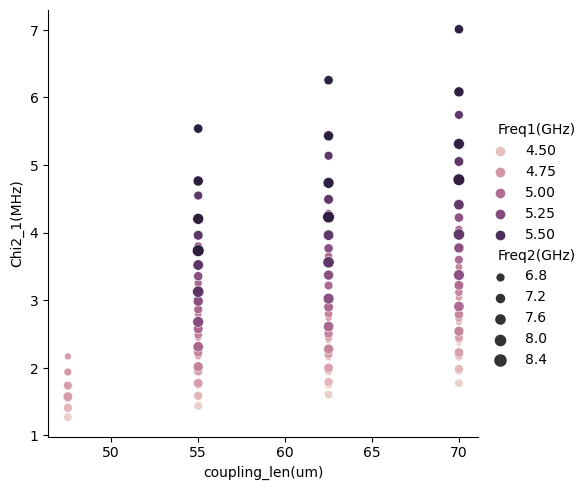

In [15]:
sns.relplot(data = data_f, x = 'coupling_len(um)', y = 'Chi2_1(MHz)', hue = 'Freq1(GHz)', size = 'Freq2(GHz)')

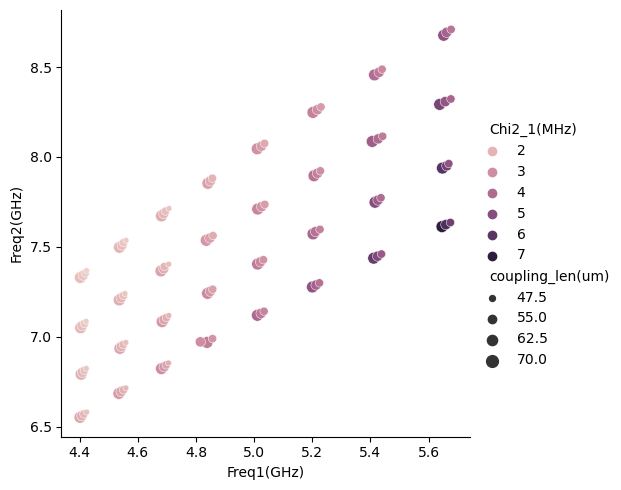

In [16]:
sns.relplot(data = data_f, size = 'coupling_len(um)', hue = 'Chi2_1(MHz)', x = 'Freq1(GHz)', y = 'Freq2(GHz)')

In [126]:
dat = pd.read_csv('CPW_QB_freq_only2.csv')
bol = dat['Chi2_1(MHz)']<1.2
dat[bol]

,Unnamed: 0,pad_size(mm),coupling_len(um),Freq1(GHz),Freq2(GHz),Freq_EPR1(MHz),Chi1_1(MHz),Freq_EPR2(MHz),Chi2_1(MHz),Chi2_2(MHz)


In [129]:
dat = pd.read_csv('CPW_QB_freq_only_0321.csv')
bol = dat['Chi2_1(MHz)']<1.2
dat[bol]

,Unnamed: 0,pad_size(mm),coupling_len(um),Freq1(GHz),Freq2(GHz),Freq_EPR1(MHz),Chi1_1(MHz),Freq_EPR2(MHz),Chi2_1(MHz),Chi2_2(MHz)
9,9,0.203333,20.0,4.789996,7.213821,4552.662081,249.968134,7213.144306,1.199628,0.001610
10,10,0.203333,20.0,4.790005,7.508614,4552.620482,250.055023,7508.020945,1.069961,0.001263
11,11,0.203333,20.0,4.789705,7.827313,4552.308936,250.096621,7826.790632,0.958747,0.001003
12,12,0.230000,20.0,4.448481,6.617974,4244.778667,213.825987,6617.375405,1.062931,0.001474
13,13,0.230000,20.0,4.446451,6.863778,4242.890084,213.705453,6863.254096,0.945022,0.001151
14,14,0.230000,20.0,4.446729,7.128647,4243.108376,213.798398,7128.184601,0.847721,0.000916
15,15,0.230000,20.0,4.446933,7.415848,4243.265469,213.871852,7415.433885,0.769088,0.000747


In [130]:
dat = pd.read_csv('CPW_QB_freq_only_0324.csv')
bol = dat['Chi2_1(MHz)']<1.2
dat[bol]

,Unnamed: 0,pad_size(mm),coupling_len(um),Freq1(GHz),Freq2(GHz),Freq_EPR1(MHz),Chi1_1(MHz),Freq_EPR2(MHz),Chi2_1(MHz),Chi2_2(MHz)
3,3,0.15,5.0,5.759035,8.8288,5411.217705,369.670014,8828.155214,1.133132,0.000985


In [132]:
dat = pd.read_csv('CPW_QB_freq_only_0324_2.csv')
bol = dat['Chi2_1(MHz)']<1.2
dat[bol]

,Unnamed: 0,pad_size(mm),coupling_len(um),Freq1(GHz),Freq2(GHz),Freq_EPR1(MHz),Chi1_1(MHz),Freq_EPR2(MHz),Chi2_1(MHz),Chi2_2(MHz)
1,1,0.176667,5.0,5.228354,7.631265,4943.841971,300.998901,7630.628643,1.097737,0.001145
2,2,0.176667,5.0,5.224563,7.958424,4940.418734,300.631012,7957.884713,0.952708,0.000849
3,3,0.176667,5.0,5.227801,8.317782,4943.260185,301.081265,8317.311737,0.849801,0.000665
4,4,0.203333,5.0,4.800327,6.964961,4561.914447,251.229025,6964.408273,0.959885,0.001042
